# EDSML group project
Seismic imaging revision assignment


### Assignment set: 10 am 16th Jan
### Assignment to be submitted: 12 noon 17th Jan


### **Format**: written answers to questions in a Jupyter notebook (please also include figures from the lecture notes or other referenced sources), coding to view seismic and calculate attributes

The purpose of this exercise is to provide you with a structured way to consolidate your understanding of seismic imaging. We have been through a lot of content quickly in 2.5 days and this exercise offers you an opportunity to think more deeply about these concepts to help you prepare for the assessed quiz next week (on Fri 24th Jan). You could rush through the activity quickly in a couple of hours just copying and pasting from the notes- but I encourage you to use this time to really make sure you understand things. Talk things through with your group as well as the GTAs who will host drop-in sessions. I will provide you with feedback on your submissions by Tuesday 21st Jan, to help you prepare for the assessed quiz. At the bottom of this notebook you will find three example questions to show you the format of the assessed quiz. Please answer these questions and you will receive feedback on these too.

#### Submission process:

As part of your group project, it's crucial that we maintain an organized and efficient submission process. To ensure this, please adhere to the following guidelines:

- One Submission Per Group: Each group is required to submit only one answer. It's important that you collaborate and consolidate your work within your group to finalize a single, representative notebook.

- Please include your group name and your answers in the email, cc-ing all members of the group and send it to:

rebecca.bell@imperial.ac.uk

psalah@imperial.ac.uk

- Feedback Process: After the submission deadline, Becky will review the submitted notebooks and provide feedback by email. It's essential to submit by the deadline to receive timely feedback.



#### Ancillary files

If your code or answers depend on additional files, such as images, photos, or small data files, then make sure to include these in your submission as well. There is no need to include the Thebe_small2 segy file. Please ensure you run all cells before submission.

## -Premise-

You work for a company who have collected a 3D seismic reflection dataset in two-way travel time, using an airgun source in an area where companies are interested in exploring for geothermal energy production. You have a potential buyer for the seismic data but they have a few questions and would like to learn more about how they can use Python to view and work with the data and they want to see some data examples and understand the future potential.

Please address their questions in the notebook below. I have provided some guidance on how much detail should be in these responses in terms of a max word limit (this is a maximum NOT a target. You can answer these questions well with far fewer words). The questions specify whether I am expecting text and figures, code or both text and code to answer the question.

Feel free to recycle code from exercise 3 and 4 (making sure you understand it!) and you can also explore additional libraries if you so wish (but not required). 

**The exercise will require you to load SEG-Y file Thebe_small2 which you can find in the 'data' folder here**- https://imperiallondon-my.sharepoint.com/personal/psalah_ic_ac_uk/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fpsalah%5Fic%5Fac%5Fuk%2FDocuments%2Fdata%2DBecky%2Dexercises&ga=1  

### Name of your company (be inventive!):

Faultless Seismology

### Team members names and email addresses:

Davide Baino, Ken Komoto, Sam Franks, Daniel Kaupa, Phileas Grenade, Jeffrey Jin

### Library Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import itertools
import scipy.ndimage
import pandas as pd
from mayavi import mlab
from PIL import Image

import warnings
warnings.filterwarnings('ignore')


## Questions

### Question 1

**Question 1**: Thank you for approaching us with your 3D seismic dataset. Could you explain to us briefly, using any figures you wish, what seismic reflection data is and why it might be useful for our company finding sites for geothermal energy production? (text,figures)(max. 300 words)

**Response**: Seismic reflection data at its simplest form  is a view into the topography of the Earth below the surface, including different materials with varied level of density. Seismic reflection data is useful because by identyfying soundwaves and their reflection, we can map the subsurface of Earth. 

When discussing the benefits of mapping seismic reflection data, we could say how this type of data solves the challenges of drilling. By creating a source (either in land or at sea) and a receiver, we can map a few layers without having to drill through it. 

Key variables in measuring seismic data are time or distance and reflection. Time, normally in microseconds, is measured between the sound emission (the source) and the receiver. When this happens, the first wave is the direct one and the later ones come from a reflection with a geological boundary. The reflection coefficient determines how much of the seismic waves will be reflected vs how much it will pass through (transmitted deeper into Earth). 

When we scale up over a larger area, we can effectively locate areas of geothermal production. We would start by using airguns at sea to map the area in depth and facilitate our drilling effort. 

You can see below a picture of seismic reflection data, where signal source comes from airguns.


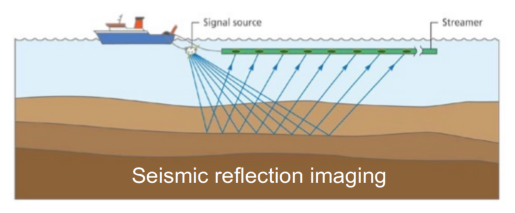

In [2]:
# Define the path
image_path = "./Images/Seismic Reflection Data.png"

# Open and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


### Question 2

**Question 2**: How does an airgun source differ to a sparker source? We are interested in imaging under the seabed to depths of >1 km, ideally down to 5 km. Would airgun or sparker data be better for us? Are there any environmental impacts of these methods and how are they mitigated? (text,figures) (max. 300 words)

**Response**: 

Airgun is a low frequency (10-400Hz) source which allows a deeper penetration through the earth's subsurface (up to 15 km) but coarser spatial resolution. It uses high pressure air in a cell to create acoustic signals. Sparker is a high frequency (0.1-2kHz) source which does not penetrate as deep as airguns (only up to ~2km) because it atenuates rapidly, but it offers higher spatial resolution. It uses electrodes to discharge, which vaporizes the sea water and creates a sound source (pressure waves).

Airgun is preferred in this case as we need to image to depths down to 5 km. However, the potential environmental impacts include that we can damage the auditory systems of many marine creatures. For example, its frequency range overlaps with the sound produced by whales. To mitigate this, we can have marine observers to warn the surveyors about the existence of vulnerable marine mammals nearby. We can also use the ramp-up procedure to give opportunities for the animals to escape from the site before the airgun reaches its full power.

### Question 3

**Question 3**: Could you explain to us what is the SEGY data format and provide us with a commented demonstration of how we can load SEGY data in Python? What are the key issues associated with loading SEGY data in Python? What are the benefits of using Python over other software? (text, code, figures) (max. 300 words)


**Response**: The SEGY data format was established for saving single-line seismic data to magnetic tapes. It is useful because besides having seismic reflection data, it includes metadata. Because developed in the past without the modern needs of data science in mind, it is definitely not efficient. 
Another key issue is that SEGY was built to read and write data to tape and not to efficiently handle a data cube (inline, xline and depth or time). If the SEGY data is not a perfect cube and the inline and xline spacing is not regular, there could be issues leading to data loagin errors. That practically drive any data practitioner to load the SEGY file in Python, and then straight away convert it to a more efficient fromat like Numpy and arrays. 
Another key issue is the size contained in SEGY data files, making it difficult to work with on an individual workstation. 
One of the main benefits of using Python over software is time. Indeed, with Python you can be flexible in downloading data, process it and then visualise. When using Python, you can basically manage all the different data processing steps, NMO corrections, data visualization and customization of attributes all in one go. What would normally take a geologist different pieces of software, a data scientist can implement on Python.
Also, being able to download, import and visualize the data in Python gives us the opportunity to slice the data in different ways, check different assumptions and deploy our own seismic data analysis strategy, not depending on anyone else’ s software. 
The last key opportunity of using Python is to apply machine learning techniques to automate lengthy processes.



In [15]:
# This is how you would load a SEGY data file in Python 
base_segy = segyio.open('../data/Thebe_small2', ignore_geometry= False)
data = segyio.tools.cube(base_segy)
print(segyio.tools.wrap(base_segy.text[0])) # Print the text header

C 1 SEGY OUTPUT FROM Petrel 2017.1 Thursday, November 18 2021 12:25:33
C 2 Name: FullStack_06-34degree Realized 1 Crop 1 Type: 3D seismic          C 3
C 4 First inline: 1556   Last inline: 2056
C 5 First xline:  1066   Last xline:  2099
C 6 CRS: Undefined
C 7 X min: 723285.20 max: 740842.39 delta: 17557.19
C 8 Y min: 7843915.02 max: 7861339.03 delta: 17424.01
C 9 Time min: -2170.50 max: -1474.50 delta: 696.00
C10 Lat min: - max: - delta: -
C11 Long min: - max: - delta: -
C12 Trace min: -2169.00 max: -1476.00 delta: 693.00
C13 Seismic (template) min: -9375.49 max: 12558.00 delta: 21933.49
C14 Amplitude (data) min: -9375.49 max: 12558.00 delta: 21933.49
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline

### Question 4

**Question 4**: Please could you present to us some examples of the data from inline 1650 and xline 1600 and time slice 1800 ms. Can you describe what the data looks like (e.g. do you see high/low amplitude reflections? Are the reflections continuous or chaotic?) and identify one obvious geological feature that you can see in xline 1600? (text, code,figures) (max. 300 words)

In [16]:
# Getting the geometry of the segy file
depth = base_segy.samples 
inlines = base_segy.ilines 
xlines = base_segy.xlines

print("The shape of the data is: ", data.shape)
print("The number of inlines is: ", len(inlines))
print("The number of xlines is: ", len(xlines))
print("The number of depth samples is: ", len(depth))

The shape of the data is:  (501, 1034, 232)
The number of inlines is:  501
The number of xlines is:  1034
The number of depth samples is:  232


In [5]:
# Inline 1650
inline_1650_index = np.where(inlines == 1650)
data_1650 = data[inline_1650_index, :, :].reshape(1034,232)

# Xline 1600
xline_1600_index = np.where(xlines == 1600)
data_1600 = data[:, xline_1600_index, :].reshape(501,232)

# Time slice 1800
time_slice_1800_index = np.where(depth == 1800)
data_1800 = data[:, :, time_slice_1800_index].reshape(501,1034)

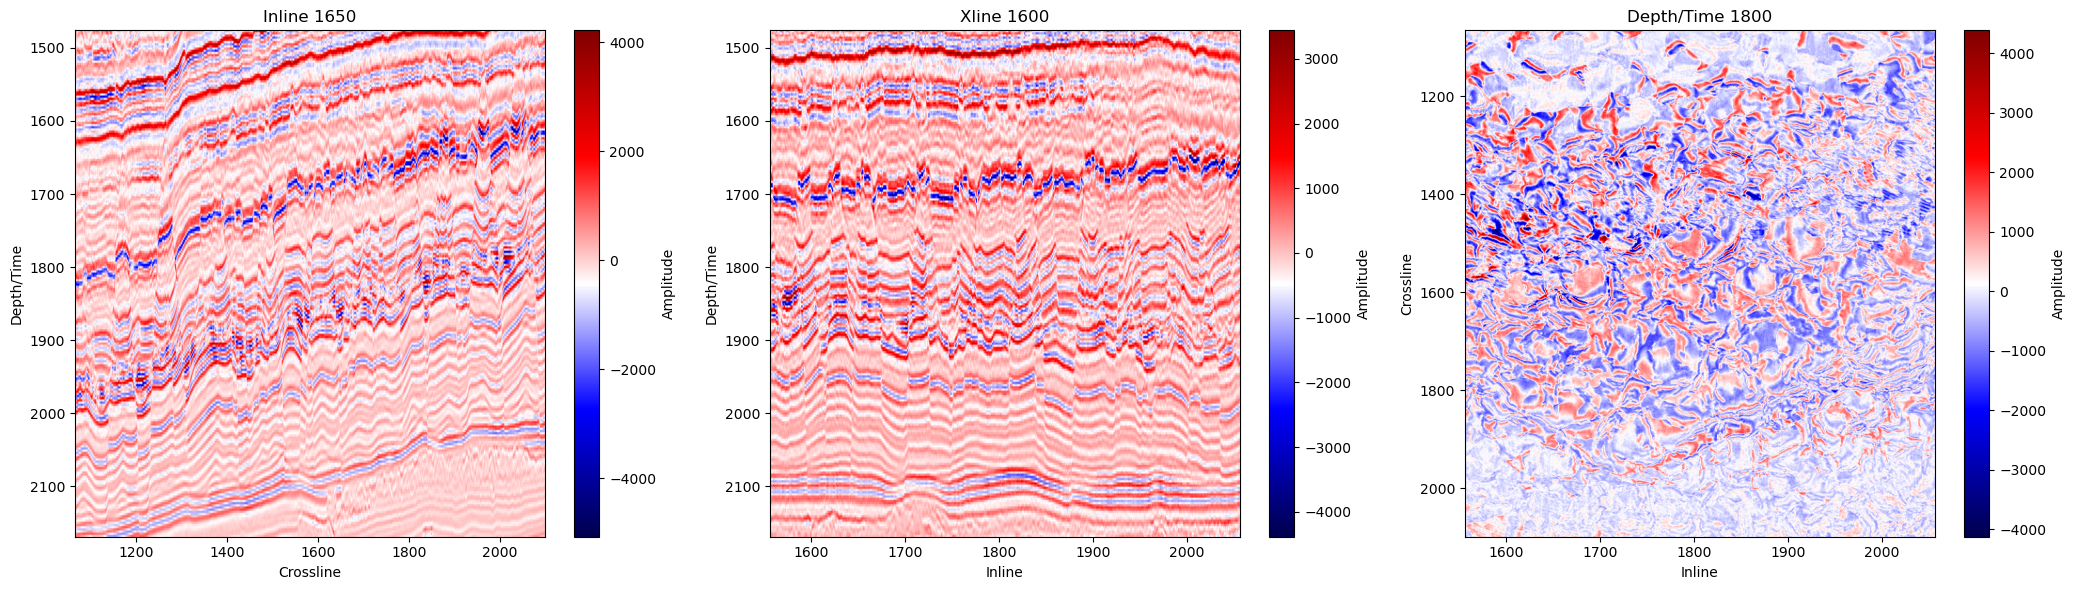

In [6]:
# Setting up a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Inline 1650
axes[0].imshow(data_1650.T, aspect='auto', cmap='seismic', extent=[xlines[0], xlines[-1], depth[0], depth[-1]])
axes[0].set_title(f"Inline {int(inlines[inline_1650_index])}")
axes[0].set_xlabel('Crossline')
axes[0].set_ylabel('Depth/Time')
axes[0].invert_yaxis()
plt.colorbar(axes[0].images[0], ax=axes[0], label='Amplitude')

# Xline 1600
axes[1].imshow(data_1600.T, aspect='auto', cmap='seismic', extent=[inlines[0], inlines[-1], depth[0], depth[-1]])
axes[1].set_title(f"Xline {int(xlines[xline_1600_index])}")
axes[1].set_xlabel('Inline')
axes[1].set_ylabel('Depth/Time')
axes[1].invert_yaxis()
plt.colorbar(axes[1].images[0], ax=axes[1], label='Amplitude')

# Time Slice 1800
axes[2].imshow(data_1800.T, aspect='auto', cmap='seismic', extent=[inlines[0], inlines[-1], xlines[0], xlines[-1]])
axes[2].set_title(f"Depth/Time {int(depth[time_slice_1800_index])}")
axes[2].set_xlabel('Inline')
axes[2].set_ylabel('Crossline')
axes[2].invert_yaxis()
plt.colorbar(axes[2].images[0], ax=axes[2], label='Amplitude')

plt.tight_layout()
plt.show()

In the above visual we have plots showing 3 different views of the data.
1. Showing the cross-section view of Xline and Depth with a fixed inline of 1650.
2. Showing the cross-section view of Inline and Depth with a fixed xline of 1600.
3. Showing the overhead view of Inline and Xline with a fixed depth/time-slice of 1800.

As shown in the visuals above, we can see a wide range of amplitudes highlighting different geological boundaries. The reflections are largely continuous indicating that the frequency used for the imaging was in the range similar to a sparker (10.5 - 10^3 Hz). There are some small sections that appear chaotic, but they are relatively small (spanning areas 5-10 meters of depth).

At inline 1650 we see many vertical lines disrupting the continuity of layers that we can see (as indicated by their amplitude). This suggests that faults are present. For example see the area around crossline 1250 and depth 1750.

At xline 1600 we can again see the faults present at inline 1650, as well as clear evidence of vertical aggradation.

For time slice 1800 we see a view looking down at the geological features. The different colors (amplitude) is indicating that there are different geological materials present at the same level, but relatively scattered and not forming a clear channel like a river or glacial valley.

In [7]:
## Code walking through frequency determination
print("The number of depth samples is: ", len(depth))

time = 696  # assumed milliseconds
time_s = time/1000  # convert to seconds
depth_samples = 232  
sample_rate = time_s/depth_samples
frequency = 1/sample_rate

print(f"The sample rate is: {sample_rate:.4f} s")
print(f"The estimated frequency is: {frequency:.2f} Hz")

The number of depth samples is:  232
The sample rate is: 0.0030 s
The estimated frequency is: 333.33 Hz


### Question 5

**Question 5**: What seismic attributes could you use to better highlight the geological feature you identified in Question 4? We would like to learn how these attributes work. Please calculate two seismic attributes of your choice to help better image this geological feature for time slice 1800 ms- which seismic attribute do you think works the best and why? (text, code,figures) (max. 300 words)

**Response**: In order to further highlight the faults exhibited in this seismic data, we could use grid-based or volume-based seismic attributes.

Grid-based seismic attributes include dip and azimuth.
* Dip is used to measure steepness and is defined as angle of at which a fault plane or rock layer inclines downward from the horizontal plane. 
* Azimuth is used to measure the direction of an object (in this case a fault) on the horizontal plane (degrees in ordinal coordinate system)

There are also a wide variety of volume-based seismic attributes derived directly from the seismic reflectivity volume that can be used to measure geographic features. A commonly used attribute is:
* Coherency: a measure of how well two or more seismic signals align or correlate with each other. This measurement can be used to help identify differences in geological features/boundaries/layers.

In [8]:
def moving_window(data, window, func):
    # `generic_filter` will give the function 1D input. We'll reshape it for convinence
    wrapped = lambda region: func(region.reshape(window))
    
    # Instead of an explicit for loop, we'll use a scipy function to do the same thing
    # The boundaries will be handled by "reflecting" the data, by default
    return scipy.ndimage.generic_filter(data, wrapped, window)

def marfurt_semblance(region):
    # We'll need an ntraces by nsamples array
    # This stacks all traces within the x-y "footprint" into one
    # two-dimensional array.
    region = region.reshape(-1, region.shape[-1])
    ntraces, nsamples = region.shape

    square_of_sums = np.sum(region, axis=0)**2
    sum_of_squares = np.sum(region**2, axis=0)
    sembl = square_of_sums.sum() / sum_of_squares.sum()
    return sembl / ntraces

In [12]:
data_1800_mid = data[:,:,time_slice_1800_index[0][0]-7: time_slice_1800_index[0][0] +8]
data_1800_mid.shape


(501, 1034, 15)

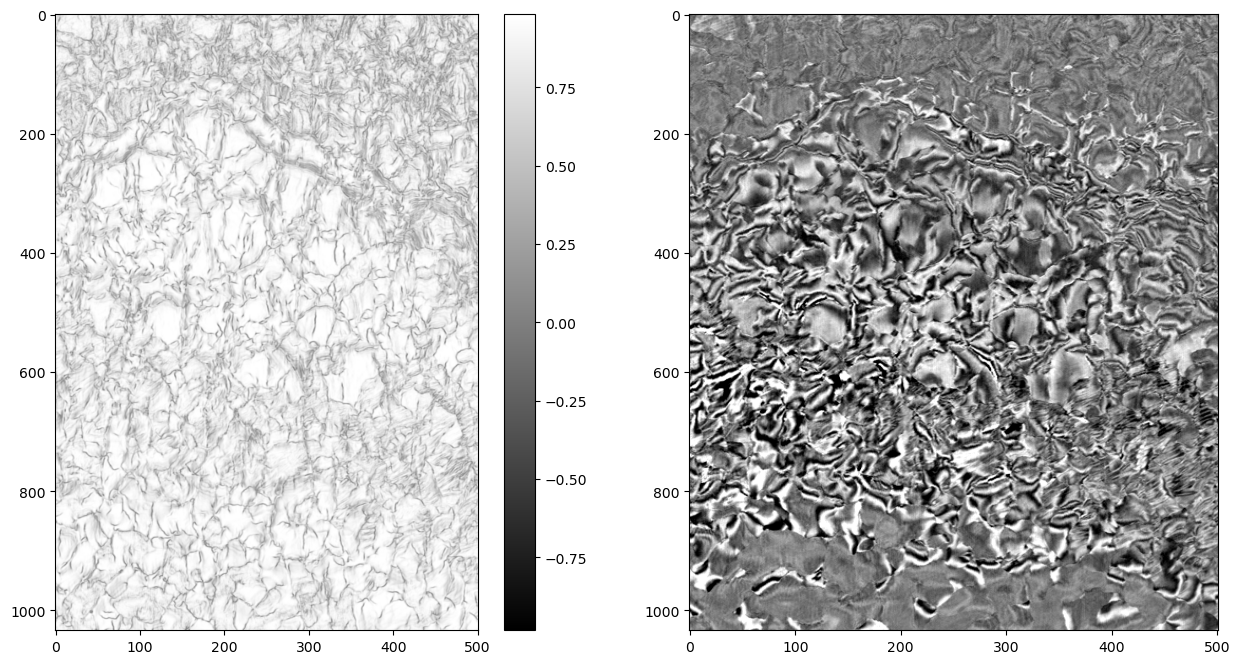

In [25]:
# due to processing cost we only run this on 15 layers
marfurt = moving_window(data_1800_mid, (3, 3, 9), marfurt_semblance)

fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(121)
vm1 = np.percentile(marfurt, 95)
plt.imshow(marfurt[:,:,8].T, cmap='gray', aspect='auto', vmin=-vm1, vmax=vm1)
plt.colorbar()
ax2 = plt.subplot(122)
vm2 = np.percentile(data, 95)
plt.imshow(data[:,:,time_slice_1800_index[0][0]].T, cmap='gray', aspect='auto', vmin=-vm2, vmax=vm2)
plt.show()

### Question 6

**Question 6**: Is there anything else you would like to show us/tell us to convince us that seismic data is the right dataset for us? In your view, how might the way we interpret seismic data change in the future?  (text,figures)(max 300 words)

**Response:**


Seismic data is the right dataset as it saves money and time compared to methods like drilling, which makes it more efficient. It is also less restricted by geography (compared to ice cores and sediment records) which allows a bigger search area. Last but not least, we have more flexibility as we can perform analysis based on the specific requirements of the project. Seismic data can be taylored to a project by usingpre-existing aornewly defined attributes., feature engineering, or even data augmentation. Following such flexible data processing pipelines, we can even adopt a machine learning approach to further promote effeciency in aspects such as resolution improvements, de-noising, and predictions.
ISeismic data has the potential for even further growth into the fututre. This could be a double-edged sword, as on one hand, our methods are becoming more refined, and accurate, and our understanding of sub-surface geology is constantly growing. More data is becoming avaiable on opn-sourced data-bases and so to investigate some areas which have already been surveyed for other purposes, large economic savings can be made. 

However on the other hand, such large datasets are presenting new challanges in their accessability and interpretability. Large amounts of data cost a lot in computing resources which are unuaccessible for many people. They are also very costly in both resources and time to process and interpret, potentially leading to cases where features are missed, or misidentified, or removed as noise. We believe that machine learning could be a valuable tool in removing some of these difficulties.

In our opinion, machine learning could be an enormous cost-saving tool. Automating data processsing steps can cut time and resource costs, allowing more resources to be allocated to intepreting the data, and potentially identifying features that are of key intrest in geothermal energy. Furthermore, machine learning could be added to the feature identification portion of the pipeline, to recognise patterns quickly and effectively and indentify more or even 'hidden' features to be exploited by the geothermal company.


--------------

### Below you can find three examples of the question format that will be used for the assessed quiz on 24th Feb. Please answer these questions as a team and I will give you feedback.

### 1)	Which of the following seismic sources would be the best to explore for unexploded ordnance a few meters below the seabed in shallow water:

#### a)	Airguns
#### b)	Vibroseis
#### c)	Dynamite
#### d)	Pingers


    D

### 2)	………….. are used to receive seismic signals in land surveys (fill in the missing word)



    Geophones

### 3)	What is the best definition of the coherency attribute:
#### a)	It is a seismic attribute that measures root mean squared amplitude to determine how similar seismic traces are
#### b)	It is a machine learning method that extracts seismic traces that have similar wavelet shape 
#### c)	It is a seismic attribute that measures the similarity between seismic traces
#### d)	It is a seismic attribute that measures the discontinuity between seismic traces


    C

Perhaps one of the best things you can do it 'revise' is to remind yourself of which topics are covered in which lecture so you can look things up if you need to (the exam will be open book)